# Observation of a new gamma-ray source class

<h5 style="text-align:right; margin-right:15px"> 2023-08-10 17:17</h5>

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2391c72170>

## Abstract
The most recent source catalog from the Large Area Telescope (LAT) instrument on
  _Fermi_, covering 14 years, contains 7190 non-transient point sources,
  of which 2371 have no co-location association with objects observed in other 
 wavelengths to provide confirmation of their identities. This has been a feature 
 of all catalogs since the first 8-month release in which 161 out of 630 were 
 unassociated. The unassociated sources (UNID) break down into roughly equal 
 Galactic and extra-Galactic populations. The origin of the latter is  accounted 
 for by the non-uniform coverage and sensitivity limit of the counterpart catalogs. 
 To examine the Galactic component of the UNID we apply a 
 predictive artificial intelligence technique using as features the 
 parameters of the peak in the spectral energy distribution, and the 
 variability measure. The UNID sources predicted to be pulsars have 
 significant spectral curvature, with peak energies in the range seen 
 in the pulsars used for training, and are clearly Galactic in spatial distribution. 
  But the range of curvatures exceeds that observed for pulsars which are limited 
 by the monoenergetic curvature radiation value. We define a selection in the range
  of spectral parameters which almost all of these satisfy,  resulting in 617 total.
Applying the same selection to each of the associated source classes we see that none of the 
 resulting spatial distributions are consistent, the closest being 
 millisecond pulsars (94) and Galactic clusters (19). 
 While there may be some undetected pulsars in this set, we conclude that the
 majority must represent a new class of gamma-ray emitting sources.

## ML step summary
* Training set: pulsars (MSP + young), BL Lacs, FSRQs
* Features:  spectral peak parameters ( energy, flux, curvature), variability, energy flux
* predictions: UNID -> (UNID-PSR, UNID-BLL, UNID-FSRQ)

## Curvature vs. $E_p$ for UNID
    

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f23914c9f90>
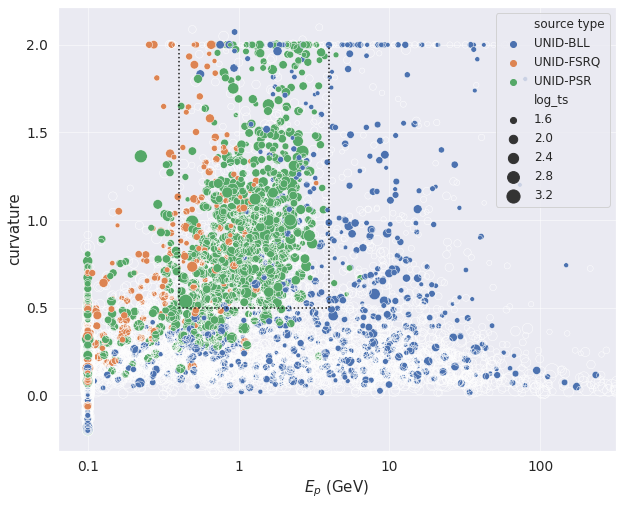

### Application of the "spectral cut" to the source classes
Selection cuts: 
* curvature>0.5
* 0.4< $E_p$ < 4 GeV  
* $F_p$ < 20 eV s-1 cm-2

source type,MSP,young,bll,fsrq,bcu,glc,other,UNID-PSR,UNID-BLL,UNID-FSRQ,Total
All,174,139,1463,790,1556,33,314,878,838,311,6496
Spectral cut,99,20,56,66,251,22,104,617,117,117,1469


### Skymaps: UNID 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f23cccd7790>
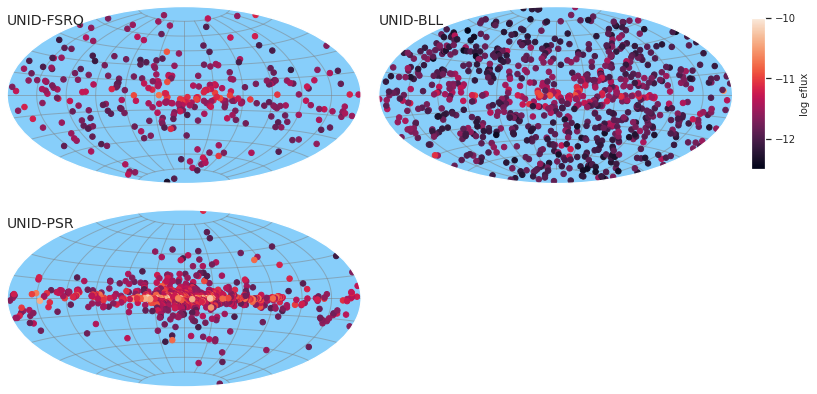

### Skymaps: UNID after spectral cut

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2390f05e70>
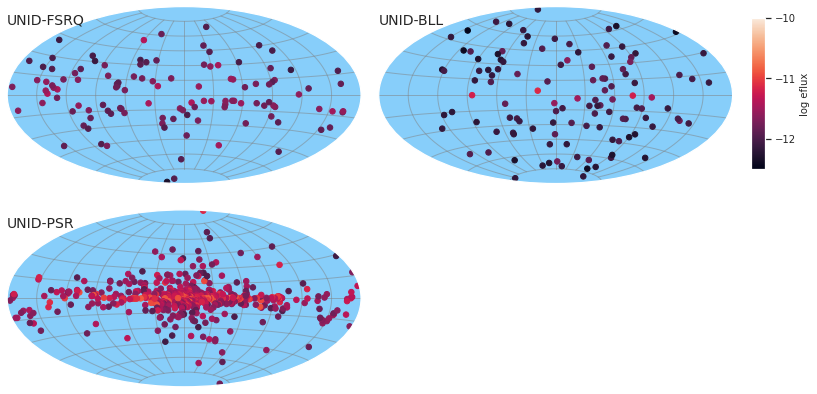

### Skymaps: Associated after spectral cut 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2391482d70>
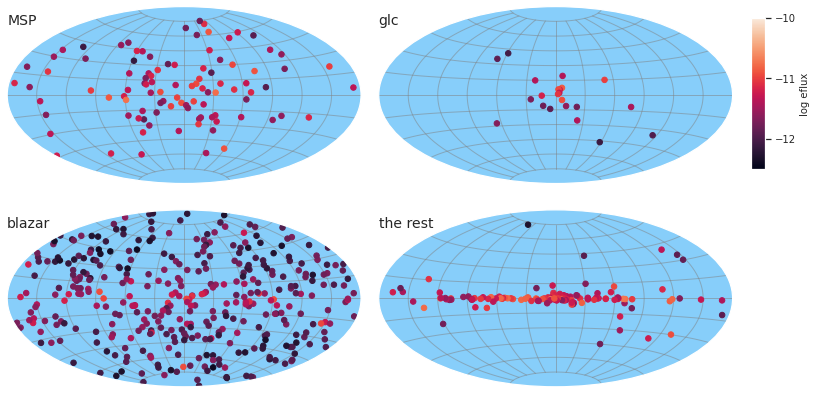

### Peak flux vs. $|b|$ 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2391c5d2d0>
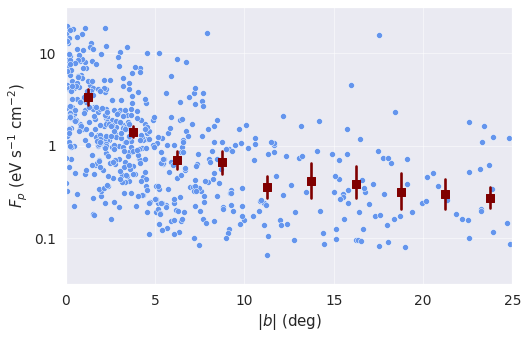

## The way forward
* Invite checks!
* Refit with 4FGL-DR4 only, (maybe Jean can produce a new version without the curvature prior? There is always DR3)
* Estimate the fraction of MSPs, using Careful comparison of the curvature distributions
* A section on previous ML results (Elizabeth)
* A section on efforts to find associations (Kent)
* Hopefully speculation on narrow curved sources

In [1]:
%run pylib/paper
self = main()